In [346]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [347]:
df = pd.read_excel('PhynetBuldout_from_Incidents1.xlsx')

#selecting only important column..

df = df[['IncidentId', 'SourceCreateDate', 'SourceModifiedDate', 'CreateDate',
       'ModifiedDate', 'ImpactStartDate', 'OccurringDatacenter',
       'RaisingDatacenter', 'OccurringDeviceName', 'Severity', 'Status',
       'IsNoise', 'IsSecurityRisk', 'IsCustomerImpacting', 'TsgId', 'Title',
       'ResolveDate', 'MitigateDate', 'ResolvedBy', 'MitigatedBy', 'HowFixed',
       'OwningTenantName', 'ResponsibleTenantName']]

In [348]:
#df.info()

'''
after checking all difference decided to go with createDate.Drop all other 4 column because it all means same only..
#df["createDateDiff"] = df["CreateDate"]- df["SourceCreateDate"]
#df["modifiedDateDiff"] = df["ModifiedDate"]- df["SourceModifiedDate"]
#df["ImpactDateDiff"] = df["ImpactStartDate"]- df["SourceCreateDate"]
'''

df.drop(['SourceCreateDate','SourceModifiedDate','ModifiedDate','ImpactStartDate'],inplace=True , axis = 1)

'''
As raisingDatacenter has more count as well as PHX not present in occuringDatacenter we decided to choose
raisingDatacenter.
'''

df.drop(['OccurringDatacenter'],inplace=True, axis = 1)

'''
As mitigateddate data is more and difference between two date is minimal so we are going with mitigated date.

#df['resolvedatediff'] = df['ResolveDate'] - df['MitigateDate']

'''
df.drop(['ResolveDate'],inplace=True, axis = 1)

'''
As mitigatedby data is more choosing mitigated by compared to resolved by
'''
df.drop(['ResolvedBy'],inplace=True, axis = 1)


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23353 entries, 0 to 23352
Data columns (total 16 columns):
IncidentId               23353 non-null int64
CreateDate               23353 non-null datetime64[ns]
RaisingDatacenter        17401 non-null object
OccurringDeviceName      18517 non-null object
Severity                 23353 non-null int64
Status                   23353 non-null object
IsNoise                  23353 non-null int64
IsSecurityRisk           23353 non-null int64
IsCustomerImpacting      23353 non-null int64
TsgId                    21093 non-null object
Title                    23353 non-null object
MitigateDate             4861 non-null datetime64[ns]
MitigatedBy              4896 non-null object
HowFixed                 5167 non-null object
OwningTenantName         23353 non-null object
ResponsibleTenantName    23353 non-null object
dtypes: datetime64[ns](2), int64(5), object(9)
memory usage: 2.9+ MB


In [349]:
# converting in minutes because we need SLA in minutes only
df['SLA'] = (df['MitigateDate'] - df['CreateDate']).astype('timedelta64[m]')
df.describe()

IncidentId      Severity       IsNoise  IsSecurityRisk  IsCustomerImpacting           SLA
count  2.335300e+04  23353.000000  23353.000000         23353.0         23353.000000   4861.000000
mean   9.980804e+07      3.475999      0.000043             0.0             0.006380   4253.650689
std    3.802602e+06      0.513554      0.006544             0.0             0.079623   6540.896853
min    9.398681e+07      2.000000      0.000000             0.0             0.000000      1.000000
25%    9.621660e+07      3.000000      0.000000             0.0             0.000000    470.000000
50%    9.955558e+07      3.000000      0.000000             0.0             0.000000   1838.000000
75%    1.029693e+08      4.000000      0.000000             0.0             0.000000   6323.000000
max    1.070052e+08      4.000000      1.000000             0.0             1.000000  69595.000000

In [350]:
# we need to perform operation on severity and sla so need to separate out those columns in dataframe 
temp_SLA = df[~df.SLA.isnull()][['Severity','SLA']]

In [351]:
temp_SLA = pd.DataFrame(temp_SLA,columns=['Severity','SLA'])

In [352]:
#need to get mean,median,mode,min,max for each severity value ex 4,3,2
severity_value = temp_SLA.Severity.value_counts().index

In [353]:
#calculating severity aggregate function using list..

minimum_value = []
maximum_value = []
mode_value = []
mean_value = []
median_value = []

for i in severity_value:
    temp = temp_SLA[temp_SLA.Severity == i]
    minimum_value.append(np.min(temp['SLA']))
    maximum_value.append(np.max(temp['SLA']))
    mean_value.append(np.mean(temp['SLA']))
    median_value.append(np.median(temp['SLA']))
    mode_value.append(temp['SLA'].mode())

In [354]:
#concatenate all severity value in a dataframe so we can showcase properly.

severity_pivot = pd.concat([pd.DataFrame(minimum_value),pd.DataFrame(maximum_value), \
           pd.DataFrame(mean_value),pd.DataFrame(median_value),pd.DataFrame(mode_value)],axis=1,)
#severity_pivot/60

In [355]:
#change column name , index and divide by 60 for converting in hours and showcase as pivot data.

severity_pivot.columns = ['min','max','mean','median','mode']
severity_pivot.index = [4,3,2]
severity_pivot = severity_pivot/60
print(round(severity_pivot))

   min     max  mean  median   mode
4  0.0  1160.0  69.0    31.0  126.0
3  0.0  1009.0  74.0    29.0  131.0
2  2.0    52.0  16.0     7.0    5.0


In [356]:
df.OwningTenantName.value_counts()

Cloudnet                                    21092
MCIO Cloud Operations Platform Services       940
Network Graph Generator Workflow Service      819
Autopilot Service Escalations                 278
Azure Capacity Infrastructure Service         145
Windows Azure Hardware RMA                     18
Azure Hardware Datacenter Manager              15
Network Operations                             15
Xstore                                         14
Compute Manager                                 6
Global Ecosystem Buildout Team                  5
Windows Azure Operations Center                 3
OneFleet Node                                   2
Network Delivery Services                       1
Name: OwningTenantName, dtype: int64

In [357]:
df.ResponsibleTenantName.value_counts()

Cloudnet                                    18862
MCIO Cloud Operations Platform Services      2668
Network Graph Generator Workflow Service     1242
Azure Capacity Infrastructure Service         329
Autopilot Service Escalations                  77
Geneva Monitoring                              47
Windows Azure Hardware RMA                     42
OneFleet Node                                  31
Azure Hardware Datacenter Manager              24
Xstore                                         19
Azure Buildout SRE                              8
Compute Manager                                 4
Name: ResponsibleTenantName, dtype: int64

In [358]:
#calculate dataframe which have mitigate value otherwise discard...

df_full = df[~df.MitigateDate.isnull()]
#df_full = df_full.sort_values(by=['IncidentId', 'CreateDate','OccurringDeviceName'], ascending=False)
df_full.shape

(4861, 17)

In [359]:
#drop duplicate across column and keeping first by default because create date is sorted in desc.

#df_full.drop_duplicates(inplace=True)


df_full['OccurringDeviceName'].replace('', np.nan, inplace=True)
df_full['RaisingDatacenter'].replace('', np.nan, inplace=True)
df_full.dropna(subset=['OccurringDeviceName'], inplace=True)
df_full.dropna(subset=['RaisingDatacenter'], inplace=True)
df_full = df_full.drop_duplicates(['IncidentId'], keep = 'first')

print(df_full.shape)
df_full.to_excel('Subset_without_null.xlsx')

(1982, 17)


In [16]:
df_full.head(5)

IncidentId          CreateDate RaisingDatacenter OccurringDeviceName  \
3     93986810 2018-12-01 00:12:05             AMS21     EuropeWest-RNG2   
8     93986903 2018-12-01 00:12:37               BY5           FID297137   
14    93987770 2018-12-01 00:17:27             PUS20             2317284   
22    93990329 2018-12-01 00:30:25             LON22       LON22PrdStr02   
31    93993495 2018-12-01 00:49:07             AMS21     EuropeWest-RNG2   

    Severity    Status  IsNoise  IsSecurityRisk  IsCustomerImpacting  \
3          4  RESOLVED        0               0                    0   
8          4  RESOLVED        0               0                    0   
14         4  RESOLVED        0               0                    0   
22         3  RESOLVED        0               0                    0   
31         3  RESOLVED        0               0                    0   

                                                TsgId  \
3   https://aka.ms/PhyNet_Build_TSG ; https://aka....   
8   https://aka.ms/PhyNet_Build_TSG ; https://aka....   
14  https://aka.ms/PhyNet_Build_TSG ; https://aka....   
22  https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka...   
31  https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka...   

                                                Title        MitigateDate  \
3   ['EuropeWest-RNG2'] deployment blocked: Networ... 2018-12-01 04:54:20   
8   ['FID297137'] deployment blocked: NetworkProvi... 2018-12-01 04:14:18   
14  ['2317284'] deployment blocked: NetworkProvisi... 2018-12-01 05:20:45   
22  ['LON22PrdStr02'] deployment blocked: NetworkP... 2018-12-05 14:50:37   
31  ['EuropeWest-RNG2'] deployment blocked: Networ... 2018-12-03 09:11:56   

   MitigatedBy             HowFixed OwningTenantName ResponsibleTenantName  \
3     v-diindu          False Alarm         Cloudnet              Cloudnet   
8     v-rorajp            By Design         Cloudnet              Cloudnet   
14    v-hancha          False Alarm         Cloudnet              Cloudnet   
22   v-ajreddy            By Design         Cloudnet              Cloudnet   
31    v-ankigu  Fixed by Automation         Cloudnet              Cloudnet   

       SLA  
3    282.0  
8    241.0  
14   303.0  
22  6620.0  
31  3382.0

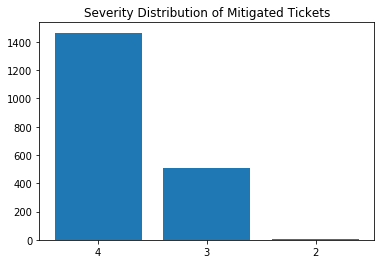

In [17]:
severity = df_full["Severity"].value_counts()

severity = severity.to_frame()
severity.columns = ['severity_value']
severity['severity_name'] = severity.index
severity.reset_index(drop=True,inplace=True)

plt.figure(figsize=(6,4)) 
y_pos = np.arange(len(severity.severity_name)) 
plt.bar(y_pos,severity.severity_value) 
plt.xticks(y_pos, severity.severity_name) 
plt.title('Severity Distribution of Mitigated Tickets')
plt.show()

### Failing network devices

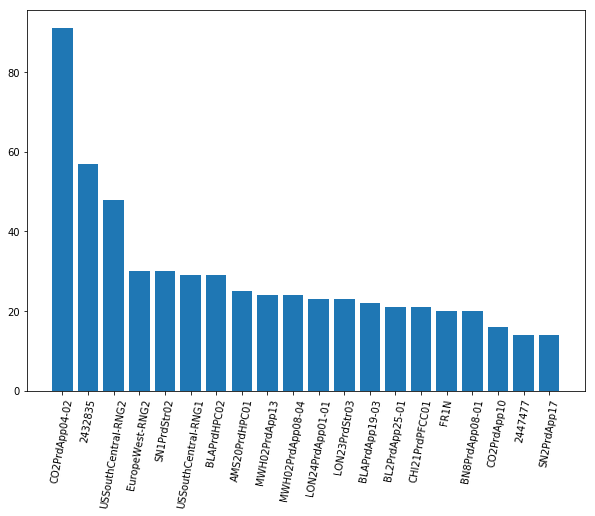

In [310]:
# checking top20 count of occuring device name and plotting it..

occuring_hist = df_full.OccurringDeviceName.value_counts().head(20)
occuring_hist = occuring_hist.to_frame()
occuring_hist.columns = ['occuring_value']
occuring_hist['occuring_name'] = occuring_hist.index
occuring_hist.reset_index(drop=True,inplace=True)
#print(occuring_hist)

plt.figure(figsize=(10,7)) 
y_pos = np.arange(len(occuring_hist.occuring_name)) 
plt.bar(y_pos,occuring_hist.occuring_value) 
plt.xticks(y_pos, occuring_hist.occuring_name,rotation=80) 
plt.show()

## Failing Data Center

In [311]:
#missing values in raising data center when mitigate value is present..
df_full.RaisingDatacenter.isnull().sum()

0

In [312]:
#checking top20 raising data center and plotting it...
raising_hist = df_full.RaisingDatacenter.value_counts().head(20)
raising_hist = raising_hist.to_frame()
raising_hist.columns = ['raising_value']
raising_hist['raising_name'] = raising_hist.index
raising_hist.reset_index(drop=True,inplace=True)

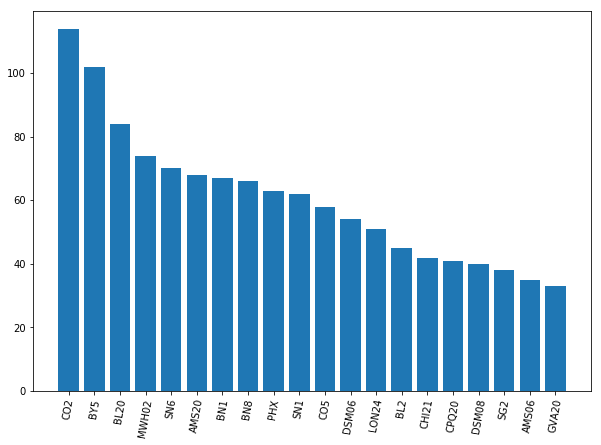

In [313]:
plt.figure(figsize=(10,7))

y_pos = np.arange(len(raising_hist.raising_name))
plt.bar(raising_hist.raising_name,raising_hist.raising_value)
#plt.xticks(y_pos, raising_hist.raising_name,rotation=80)
plt.xticks(raising_hist.raising_name,rotation=80)
plt.show()

In [316]:
df_full.head()

IncidentId          CreateDate RaisingDatacenter OccurringDeviceName  Severity    Status  IsNoise  IsSecurityRisk  IsCustomerImpacting                                              TsgId                                              Title        MitigateDate MitigatedBy             HowFixed OwningTenantName ResponsibleTenantName     SLA
3     93986810 2018-12-01 00:12:05             AMS21     EuropeWest-RNG2         4  RESOLVED        0               0                    0  https://aka.ms/PhyNet_Build_TSG ; https://aka....  ['EuropeWest-RNG2'] deployment blocked: Networ... 2018-12-01 04:54:20    v-diindu          False Alarm         Cloudnet              Cloudnet   282.0
8     93986903 2018-12-01 00:12:37               BY5           FID297137         4  RESOLVED        0               0                    0  https://aka.ms/PhyNet_Build_TSG ; https://aka....  ['FID297137'] deployment blocked: NetworkProvi... 2018-12-01 04:14:18    v-rorajp            By Design         Cloudnet              Cloudnet   241.0
14    93987770 2018-12-01 00:17:27             PUS20             2317284         4  RESOLVED        0               0                    0  https://aka.ms/PhyNet_Build_TSG ; https://aka....  ['2317284'] deployment blocked: NetworkProvisi... 2018-12-01 05:20:45    v-hancha          False Alarm         Cloudnet              Cloudnet   303.0
22    93990329 2018-12-01 00:30:25             LON22       LON22PrdStr02         3  RESOLVED        0               0                    0  https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka...  ['LON22PrdStr02'] deployment blocked: NetworkP... 2018-12-05 14:50:37   v-ajreddy            By Design         Cloudnet              Cloudnet  6620.0
31    93993495 2018-12-01 00:49:07             AMS21     EuropeWest-RNG2         3  RESOLVED        0               0                    0  https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka...  ['EuropeWest-RNG2'] deployment blocked: Networ... 2018-12-03 09:11:56    v-ankigu  Fixed by Automation         Cloudnet              Cloudnet  3382.0

### Tsg Recommendation based on an incident profile

In [318]:
Tsg_df = df_full.iloc[:,[0,2,3,4,8,9,10,14,15]]
Tsg_df.head()
Tsg_df.shape

(1982, 9)

In [319]:
Tsg_df.head()

IncidentId RaisingDatacenter OccurringDeviceName  Severity  IsCustomerImpacting                                              TsgId                                              Title OwningTenantName ResponsibleTenantName
3     93986810             AMS21     EuropeWest-RNG2         4                    0  https://aka.ms/PhyNet_Build_TSG ; https://aka....  ['EuropeWest-RNG2'] deployment blocked: Networ...         Cloudnet              Cloudnet
8     93986903               BY5           FID297137         4                    0  https://aka.ms/PhyNet_Build_TSG ; https://aka....  ['FID297137'] deployment blocked: NetworkProvi...         Cloudnet              Cloudnet
14    93987770             PUS20             2317284         4                    0  https://aka.ms/PhyNet_Build_TSG ; https://aka....  ['2317284'] deployment blocked: NetworkProvisi...         Cloudnet              Cloudnet
22    93990329             LON22       LON22PrdStr02         3                    0  https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka...  ['LON22PrdStr02'] deployment blocked: NetworkP...         Cloudnet              Cloudnet
31    93993495             AMS21     EuropeWest-RNG2         3                    0  https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka...  ['EuropeWest-RNG2'] deployment blocked: Networ...         Cloudnet              Cloudnet

In [320]:
Tsg_df.dropna(inplace=True)
Tsg_df.shape

(1969, 9)

In [24]:
Incident_id = pd.DataFrame(Tsg_df['IncidentId'])
Incident_id['index_value'] = Incident_id.index
Incident_id.reset_index(drop=True,inplace=True)


Tsg_df.drop(columns=['IncidentId'],inplace=True)

In [25]:
y = Tsg_df['TsgId']
X = Tsg_df.drop(['TsgId'], axis=1)
X.head(10)
#y.head(10)

RaisingDatacenter  OccurringDeviceName  Severity  IsCustomerImpacting  \
3              AMS21      EuropeWest-RNG2         4                    0   
8                BY5            FID297137         4                    0   
14             PUS20              2317284         4                    0   
22             LON22        LON22PrdStr02         3                    0   
31             AMS21      EuropeWest-RNG2         3                    0   
36             AMS21      EuropeWest-RNG2         4                    0   
40             MWH02     MWH02PrdApp08-04         4                    0   
46               BN8              2488169         3                    0   
87              DM3N  DM3S-0101-0107-14T0         3                    0   
93               BN8          BN8PrdStp03         4                    0   

   OwningTenantName ResponsibleTenantName  
3          Cloudnet              Cloudnet  
8          Cloudnet              Cloudnet  
14         Cloudnet              Cloudnet  
22         Cloudnet              Cloudnet  
31         Cloudnet              Cloudnet  
36         Cloudnet              Cloudnet  
40         Cloudnet              Cloudnet  
46         Cloudnet              Cloudnet  
87         Cloudnet              Cloudnet  
93         Cloudnet              Cloudnet

In [26]:
y.value_counts()

Onenote - https://aka.ms/PhyNet_Build_TSG ;  AzureWiki - https://aka.ms/AzureWiki_PhyNet_Build_TSG    900
https://aka.ms/PhyNet_Build_TSG ; https://aka.ms/AzureWiki_PhyNet_Build_TSG                           803
https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka.ms/AzureWiki_PhyNet_Build_TSG                          232
https://aka.ms/PhyNet_Build_TSG ; https://aka.ms/AzureWiki_PhyNe                                       12
https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka.ms/AzureWiki_PhyNe                                      11
Onenote - https://aka.ms/PhyNet_Build_TSG ;  AzureWiki - https:/                                       10
https://aka.ms/PhyNet_Build_TSG ; \n https://aka.ms/AzureWiki_PhyNet_Build_TSG                          1
Name: TsgId, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import confusion_matrix,f1_score,r2_score

In [28]:
label_index = ['RaisingDatacenter','OccurringDeviceName','OwningTenantName','ResponsibleTenantName']

for i in label_index:
    X[i] = LabelEncoder().fit_transform(X[i])

In [29]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)
le_name_mapping = dict(zip(le_y.classes_, le_y.transform(le_y.classes_)))
print(le_name_mapping)

{'Onenote - https://aka.ms/PhyNet_Build_TSG ;  AzureWiki - https:/': 0, 'Onenote - https://aka.ms/PhyNet_Build_TSG ;  AzureWiki - https://aka.ms/AzureWiki_PhyNet_Build_TSG': 1, 'https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka.ms/AzureWiki_PhyNe': 2, 'https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka.ms/AzureWiki_PhyNet_Build_TSG': 3, 'https://aka.ms/PhyNet_Build_TSG ; \\n https://aka.ms/AzureWiki_PhyNet_Build_TSG': 4, 'https://aka.ms/PhyNet_Build_TSG ; https://aka.ms/AzureWiki_PhyNe': 5, 'https://aka.ms/PhyNet_Build_TSG ; https://aka.ms/AzureWiki_PhyNet_Build_TSG': 6}


In [30]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# unique, counts = np.unique(y_train, return_counts=True)
# print(unique, counts)
# unique, counts = np.unique(y_test, return_counts=True)
# print(unique, counts)

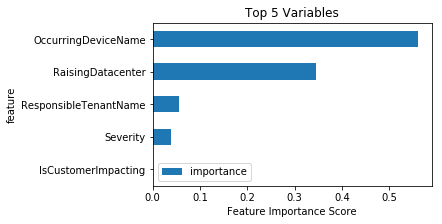

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

feat_imp = pd.DataFrame({'importance':rf.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:5]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Top 5 Variables", figsize=(5,3))
plt.xlabel('Feature Importance Score')
plt.show()

In [32]:
y_test_map = y_test.copy()
y_test_map = pd.DataFrame(y_test_map)
y_test_map['index_value'] = X_test.index
y_test_map.rename(columns={0:'value'},inplace=True)
y_test_map = y_test_map.merge(Incident_id,on='index_value')
y_test_map['predicted_value'] = rf.predict(X_test)
y_test_map.drop(columns=['index_value'],inplace=True)
y_test_map.to_excel('tsg_y_test.xlsx')

In [33]:
print("CONFUSION MATRIX FOR TEST DATA SET")
pd.crosstab(y_test, rf.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True).T

CONFUSION MATRIX FOR TEST DATA SET


True       0    1  2   3  4  5    6  All
Predicted                               
1          0  198  0  20  1  0   28  247
2          0    2  5   0  0  0    0    7
3          1   21  0  25  0  0    6   53
5          0    1  0   0  0  1    1    3
6          1   53  2  18  0  2  205  281
All        2  275  7  63  1  3  240  591

In [34]:
print("F1 SCORE FOR TEST DATA SET ======>>>>>", f1_score(y_test,rf.predict(X_test),average='macro'))

F1 SCORE FOR TEST DATA SET ======>>>>> 0.43203177094519063


In [35]:
print("CONFUSION MATRIX FOR TRAIN DATA SET")
pd.crosstab(y_train, rf.predict(X_train), rownames=['True'], colnames=['Predicted'], margins=True).T

CONFUSION MATRIX FOR TRAIN DATA SET


True       0    1  2    3  5    6   All
Predicted                              
0          5    0  0    0  0    0     5
1          1  591  0   22  1   19   634
2          0    1  4    3  0    0     8
3          0    7  0  124  0    8   139
5          0    0  0    0  8    0     8
6          2   26  0   20  0  536   584
All        8  625  4  169  9  563  1378

In [36]:
print("F1 SCORE FOR TRAIN DATA SET ======>>>>>", f1_score(y_train,rf.predict(X_train),average='macro'))

F1 SCORE FOR TRAIN DATA SET ======>>>>> 0.8426201820917364


# Recommendation TSG

In [37]:
recomm_x = pd.DataFrame(X.OccurringDeviceName).reset_index(drop=True)
recomm_y = pd.DataFrame(y).reset_index(drop=True)
recomm_y.columns = ['TsgId']
recomm_df = pd.concat([recomm_x,recomm_y],axis=1)
recomm_df.columns

Index(['OccurringDeviceName', 'TsgId'], dtype='object')

In [38]:
recomm_df = recomm_df.groupby(['OccurringDeviceName','TsgId'],as_index=True)['TsgId'].count()
recomm_df = pd.DataFrame(recomm_df)
recomm_df.columns = ['tsg_count']
recomm_df['OccurringDeviceName'] = recomm_df.index.get_level_values(0)
recomm_df['TsgId'] = recomm_df.index.get_level_values(1)

In [39]:
recomm_df.index = recomm_df.index.droplevel(level=0)

In [40]:
recomm_df.rename_axis(None,inplace=True)
recomm_df.head()

tsg_count  OccurringDeviceName  TsgId
3          1                    0      3
6          1                    1      6
1          1                    2      1
6          2                    3      6
6          2                    4      6

In [41]:
recomm_pivot = recomm_df.pivot_table(columns=['OccurringDeviceName'],index=['TsgId'],values=['tsg_count'],fill_value=0)

In [42]:
recomm_pivot.columns = recomm_pivot.columns.droplevel()

In [43]:
recomm_pivot

OccurringDeviceName  0    1    2    3    4    5    6    7    8    9   ...   \
TsgId                                                                 ...    
0                      0    0    0    0    0    0    0    0    0    0 ...    
1                      0    0    1    0    0    1    0    1    1    1 ...    
2                      0    0    0    0    0    0    0    0    0    0 ...    
3                      1    0    0    0    0    0    0    0    0    0 ...    
4                      0    0    0    0    0    0    0    0    0    0 ...    
5                      0    0    0    0    0    0    0    0    0    0 ...    
6                      0    1    0    2    2    0    2    0    0    0 ...    

OccurringDeviceName  617  618  619  620  621  622  623  624  625  626  
TsgId                                                                  
0                      0    0    1    0    0    0    0    0    0    0  
1                      0    0    1    0    0    2    1    0    0    4  
2                      0    0    0    0    0    0    0    0    0    0  
3                      0    0    0    0    0    0    0    1    0    3  
4                      0    0    0    0    0    0    0    0    0    0  
5                      0    0    0    0    0    0    0    0    0    0  
6                      8    4    3    2    8    0    0    0    1    0  

[7 rows x 627 columns]

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

recomm_sm = cosine_similarity(recomm_pivot)
recomm_sm = pd.DataFrame(recomm_sm,index=recomm_pivot.index,columns=recomm_pivot.index)
recomm_sm.values[[np.arange(recomm_sm.shape[0])]*2] = 0
recomm_sm

TsgId         0         1         2         3         4         5         6
TsgId                                                                      
0      0.000000  0.033479  0.000000  0.011070  0.000000  0.000000  0.020195
1      0.033479  0.000000  0.023878  0.202129  0.016288  0.008706  0.038139
2      0.000000  0.023878  0.000000  0.102643  0.000000  0.000000  0.006502
3      0.011070  0.202129  0.102643  0.000000  0.035007  0.009356  0.280944
4      0.000000  0.016288  0.000000  0.035007  0.000000  0.000000  0.010644
5      0.000000  0.008706  0.000000  0.009356  0.000000  0.000000  0.034136
6      0.020195  0.038139  0.006502  0.280944  0.010644  0.034136  0.000000

In [45]:
tsg_choosen_sm = pd.DataFrame(recomm_sm.loc[0])
tsg_choosen_sm['TsgId'] = tsg_choosen_sm.index
tsg_choosen_sm.sort_values(by=0,ascending=False)

0  TsgId
TsgId                 
1      0.033479      1
6      0.020195      6
3      0.011070      3
0      0.000000      0
2      0.000000      2
4      0.000000      4
5      0.000000      5

### Automatic routing to right #engineer based on issue type

In [46]:
df_agent_clustering = df_full[['RaisingDatacenter','OccurringDeviceName',
                                      'Severity','IsCustomerImpacting','TsgId','MitigatedBy',
                                      'OwningTenantName','ResponsibleTenantName']]
df_agent_clustering.dropna(inplace=True)
df_agent_clustering.shape

(1969, 8)

In [47]:
label_index = ['RaisingDatacenter','OccurringDeviceName','TsgId','MitigatedBy','OwningTenantName','ResponsibleTenantName']

for i in label_index:
    df_agent_clustering[i] = LabelEncoder().fit_transform(df_agent_clustering[i])
df_agent_clustering.head(5)

RaisingDatacenter  OccurringDeviceName  Severity  IsCustomerImpacting  \
3                   4                  401         4                    0   
8                  23                  407         4                    0   
14                 80                   52         4                    0   
22                 57                  460         3                    0   
31                  4                  401         3                    0   

    TsgId  MitigatedBy  OwningTenantName  ResponsibleTenantName  
3       6           86                 0                      3  
8       6           99                 0                      3  
14      6           88                 0                      3  
22      3           80                 0                      3  
31      3           83                 0                      3

In [48]:
df_agent_freq = df_agent_clustering.MitigatedBy.value_counts()

df_agent_freq = df_agent_freq.to_frame()

df_agent_freq.columns = ['Frequency']
df_agent_freq['MitigatedBy'] = df_agent_freq.index
df_agent_freq.reset_index(drop=True,inplace=True)
#print(df_agent_freq)

#pd.merge(df_agent_clustering,df_agent_freq,on='MitigatedBy')
df_agent_clustering = df_agent_clustering.join(df_agent_freq.set_index('MitigatedBy'), on='MitigatedBy')


In [49]:
print(df_agent_clustering['Frequency'].describe())
#print(df_agent_clustering.iloc[8,0])
df_agent_clustering["Binned"] = 0

count    1969.000000
mean      141.550533
std        86.536194
min         1.000000
25%        64.000000
50%       164.000000
75%       211.000000
max       248.000000
Name: Frequency, dtype: float64


In [51]:
for i in range(len(df_agent_clustering)):
    if df_agent_clustering.iloc[i,8] >= 200:       
        df_agent_clustering.iloc[i,9] = 1
    elif df_agent_clustering.iloc[i,8] >= 150 and df_agent_clustering.iloc[i,8] < 200:
         df_agent_clustering.iloc[i,9] = 2
    elif df_agent_clustering.iloc[i,8] >= 100 and df_agent_clustering.iloc[i,8] < 150:
         df_agent_clustering.iloc[i,9] = 3
    else:
         df_agent_clustering.iloc[i,9] = 4     

In [52]:
#print(df_agent_clustering.head())
temp = pd.DataFrame(pd.crosstab(df_agent_clustering['Binned'],df_agent_clustering['MitigatedBy'])).T
temp.to_excel("Number_Of_Agents_In_Each_Group.xlsx")

In [53]:
X = df_agent_clustering[['RaisingDatacenter','OccurringDeviceName', 'Severity','IsCustomerImpacting','TsgId',
                                      'OwningTenantName','ResponsibleTenantName']]
y = df_agent_clustering[['Binned']]

In [54]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)




# unique, counts = np.unique(y_train, return_counts=True)
# print(unique, counts)
# unique, counts = np.unique(y_test, return_counts=True)
# print(unique, counts)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)


y_test_map = y_test.copy()
y_test_map = pd.DataFrame(y_test_map)
y_test_map['index_value'] = X_test.index
y_test_map.rename(columns={0:'value'},inplace=True)
y_test_map = y_test_map.merge(Incident_id,on='index_value')
y_test_map['predicted_value'] = rf.predict(X_test)
y_test_map.drop(columns=['index_value'],inplace=True)
y_test_map.to_excel('route_y_test.xlsx')

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)


In [55]:
confusion_train = confusion_matrix(y_train,y_train_pred)
confusion_test = confusion_matrix(y_test,y_test_pred)

print("\nConfusion matrix for train data\n")
print(confusion_train)

print("\nConfusion matrix for test data\n")
print(confusion_test)


Confusion matrix for train data

[[555  10   6  49]
 [ 14  88   1  10]
 [ 12   3  50  10]
 [ 67  14   6 483]]

Confusion matrix for test data

[[199  11   7  56]
 [ 19  14   0  18]
 [ 13   1  14  10]
 [ 48  15  13 153]]


In [56]:
print("Train data F1-score=",f1_score(y_train,y_train_pred,average='macro'))
print("Test data F1-score=",f1_score(y_test,y_test_pred,average='macro'))

Train data F1-score= 0.8082310985830763
Test data F1-score= 0.5177258920611225


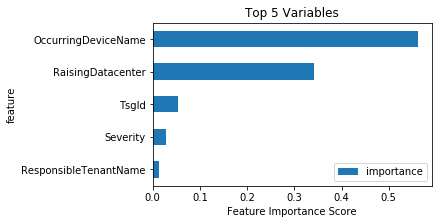

In [57]:
feat_imp = pd.DataFrame({'importance':rf.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:5]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Top 5 Variables", figsize=(5,3))
plt.xlabel('Feature Importance Score')
plt.show()

### Predictive TAT for an incident, based on previous incident resolution history

In [58]:
df_SLA = df_full[['RaisingDatacenter','OccurringDeviceName',
                  'Severity','IsCustomerImpacting','TsgId','OwningTenantName','ResponsibleTenantName','SLA']]
df_SLA.dropna(inplace=True)
df_SLA.shape
#df_SLA.head(10)

(1969, 8)

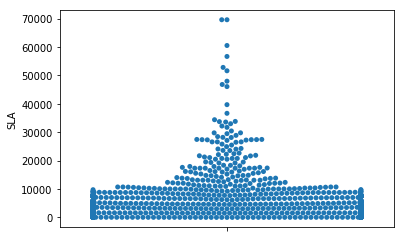

In [59]:
sns.swarmplot(y = df_SLA['SLA'])

In [60]:
df_SLA.describe()

Severity  IsCustomerImpacting           SLA
count  1969.000000          1969.000000   1969.000000
mean      3.736414             0.001524   3855.671407
std       0.450947             0.039014   6353.541119
min       2.000000             0.000000      1.000000
25%       3.000000             0.000000    519.000000
50%       4.000000             0.000000   1627.000000
75%       4.000000             0.000000   4466.000000
max       4.000000             1.000000  69595.000000

In [ ]:
df_SLA = df_SLA[df_SLA.SLA <= 15000]

In [62]:
X = df_SLA[['RaisingDatacenter','OccurringDeviceName','Severity',
                 'IsCustomerImpacting','TsgId','OwningTenantName','ResponsibleTenantName']]
y = df_SLA[['SLA']]

label_index = ['RaisingDatacenter','OccurringDeviceName','TsgId','OwningTenantName','ResponsibleTenantName']

for i in label_index:
    X[i] = LabelEncoder().fit_transform(X[i])

In [63]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.30, random_state=42)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
y_test_map = y_test.copy()
y_test_map = pd.DataFrame(y_test_map)
y_test_map['index_value'] = X_test.index
y_test_map.rename(columns={0:'value'},inplace=True)
y_test_map = y_test_map.merge(Incident_id,on='index_value')
y_test_map['predicted_value'] = rf_reg.predict(X_test)
y_test_map.drop(columns=['index_value'],inplace=True)
y_test_map.to_excel('TAT_y_test.xlsx')

Random forest output

R2 for training Dataset
0.7632342924597877

R2 for test Dataset
0.20648648389989


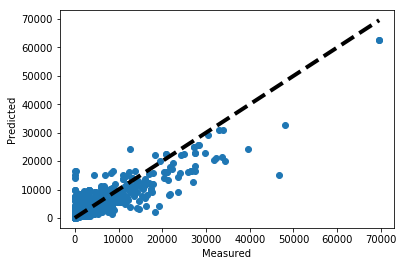

In [65]:

print("Random forest output\n")

print("R2 for training Dataset")
print(r2_score(y_train,rf_reg.predict(X_train)))

print("\nR2 for test Dataset")
print(r2_score(y_test,rf_reg.predict(X_test)))

fig,ax = plt.subplots()
ax.scatter(y_train, rf_reg.predict(X_train))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
#fig.show()
plt.show()

In [166]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer

In [321]:
Tsg_df['word_count'] = df_full['Title'].apply(lambda x: len(str(x).split(" ")))
print(Tsg_df[['Title','word_count']].head())

                                                Title  word_count
3   ['EuropeWest-RNG2'] deployment blocked: Networ...          10
8   ['FID297137'] deployment blocked: NetworkProvi...          10
14  ['2317284'] deployment blocked: NetworkProvisi...          10
22  ['LON22PrdStr02'] deployment blocked: NetworkP...          10
31  ['EuropeWest-RNG2'] deployment blocked: Networ...          10


In [322]:
#removing brackets from string..

Tsg_df['Title'] = Tsg_df['Title'].apply(lambda x :re.sub("[\(\[].*?[\)\]]","",x))

In [323]:
#removing punctation from string..

Tsg_df['Title'] = Tsg_df['Title'].str.replace('[^\w\s]','')

In [324]:
#converting into lower case..

Tsg_df['Title'] = Tsg_df['Title'].apply(lambda x : x.lower())

In [325]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/m1039261/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [326]:
#removing stop words..

Tsg_df['Title'] = Tsg_df['Title'].apply(lambda x: " ".join(x for x in x.split() if x not in 
                                                                         stop_words))

In [327]:
#getting top 10 common and rare words..
freq = pd.Series(' '.join(Tsg_df['Title']).split()).value_counts()
top_common_words = freq.head(10)
rare_words = freq.tail(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

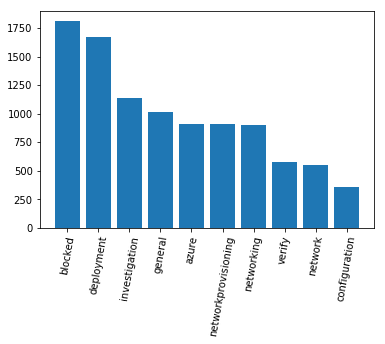

In [328]:
plt.bar(top_common_words.index,top_common_words.values)
plt.xticks(rotation=80)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

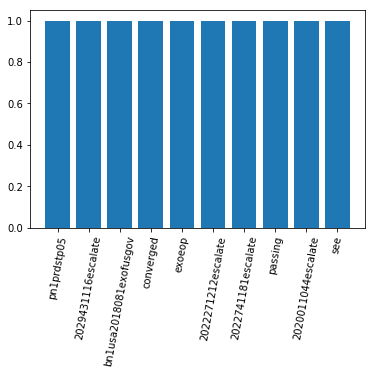

In [329]:
plt.bar(rare_words.index,rare_words.values)
plt.xticks(rotation=80)

In [330]:
#removing top 10 rare words..

Tsg_df['Title']=Tsg_df['Title'].apply(lambda x:" ".join(x for x in x.split() if x not in rare_words))

In [172]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/m1039261/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [331]:
#lemmatizing word in strings..
Tsg_df['Title'] = Tsg_df['Title'].apply(lambda x :' '.join([Word(word).lemmatize() for word in x.split()]))

In [332]:
#using tf-idf vectorizer for checking similarity
tfidf = TfidfVectorizer(max_features=200, analyzer='word', stop_words= 'english',ngram_range=(1,1), token_pattern=r'\w{3,}')
tfidf_vect = tfidf.fit_transform(Tsg_df['Title'])


In [333]:
tfidf_vect.shape

(1969, 200)

In [334]:
#df_full.TsgId.fillna(value='ffill',inplace=True)

X = Tsg_df[['RaisingDatacenter','OccurringDeviceName','Severity','ResponsibleTenantName','OwningTenantName','TsgId']]

label_index = ['RaisingDatacenter','OccurringDeviceName','Severity','ResponsibleTenantName','OwningTenantName','TsgId']

for i in label_index:
    X[i] = LabelEncoder().fit_transform(X[i])


In [335]:
Tsg_tf_idf = pd.concat([X.reset_index(drop=True),pd.DataFrame(tfidf_vect.toarray())],axis=1)

In [336]:
y = Tsg_tf_idf['TsgId']

In [337]:
X = Tsg_tf_idf.iloc[:,Tsg_tf_idf.columns!='TsgId']

In [338]:
y.unique()

array([6, 3, 5, 2, 4, 1, 0])

In [339]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.30, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [340]:
f1_score(y_test,rf.predict(X_test),average='macro')

0.5918095501683853

In [341]:
f1_score(y_train,rf.predict(X_train),average='macro')

0.8708802124779594

In [344]:
pd.crosstab(y_train, rf.predict(X_train), rownames=['True'], colnames=['Predicted'], margins=True).T

True       0    1  2    3  5    6   All
Predicted                              
0          6    1  0    0  0    0     7
1          1  601  0   12  0   17   631
2          0    1  4    3  0    0     8
3          0    7  0  136  0    7   150
5          0    0  0    0  9    0     9
6          1   15  0   18  0  539   573
All        8  625  4  169  9  563  1378

In [345]:
pd.crosstab(y_test, rf.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True).T

True       0    1  2   3  4  5    6  All
Predicted                               
0          2    0  0   0  0  1    0    3
1          0  216  1  12  1  0   34  264
2          0    2  5   0  0  0    0    7
3          0    8  0  29  0  0    6   43
5          0    0  0   0  0  1    0    1
6          0   49  1  22  0  1  200  273
All        2  275  7  63  1  3  240  591